In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from collections import Counter
import math
%matplotlib inline

In [2]:
#read and oragnize file
df = pd.read_csv("./adult.data.txt", header=None, sep=", ")
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "class"]
df = df[df["workclass"] != '?']
df = df[df["fnlwgt"] != '?']
df = df[df["education"] != '?']
df = df[df["education-num"] != '?']
df = df[df["marital-status"] != '?']
df = df[df["occupation"] != '?']
df = df[df["relationship"] != '?']
df = df[df["race"] != '?']
df = df[df["sex"] != '?']
df = df[df["capital-gain"] != '?']
df = df[df["capital-loss"] != '?']
df = df[df["native-country"] != '?']
df = df[df["native-country"] != '?']
df = df[df["class"] != '?']
above_50k = df[df["class"] == ">50K"]
below_50k = df[df["class"] == "<=50K"]
print("Count(Above 50K) = " + str(len(above_50k.index)))
print("Count(Below 50K) = " + str(len(below_50k.index)))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


Count(Above 50K) = 7508
Count(Below 50K) = 22654


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [3]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
def analyze_numerical_data(column):
    above_data = list(above_50k[column])
    below_data = list(below_50k[column])
    
    print(column)
    print()
    print("Mean")
    print("Above 50K = " + str(np.mean(above_data)))
    print("Below 50K = " + str(np.mean(below_data)))
    print()
    print("Median")
    print("Above 50K = " + str(np.median(above_data)))
    print("Below 50K = " + str(np.median(below_data)))
    print()
    print("Standard Deviation")
    print("Above 50K = " + str(np.std(above_data)))
    print("Below 50K = " + str(np.std(below_data)))

    plt.close()
    fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(10,10))
    fig.subplots_adjust(hspace=.5)
    
#     axes[0, 0].boxplot(above_data)
#     axes[0, 0].set_title(">50K")
#     axes[0, 0].set_xlabel(column)
    
#     axes[0, 1].boxplot(below_50k)
#     axes[0, 1].set_title("<=50K")
#     axes[0, 1].set_xlabel(column)
    
    axes[0].hist(above_data)
    axes[0].set_title(">50K")
    axes[0].set_xlabel(column)
    
    axes[1].hist(below_data)
    axes[1].set_title("<=50K")
    axes[1].set_xlabel(column)
    
    plt.show()
    

In [5]:
def analyze_categorical_data(column):
    above_data = Counter(above_50k[column])
    below_data = Counter(below_50k[column])
    print(column)
    plt.close()
    fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(5,10))
    axes[0].pie(above_data.values(), labels=above_data.keys(), autopct='%1.0f%%')
    axes[0].set_title("{} in >50K".format(column))
    axes[1].pie(below_data.values(), labels=below_data.keys(), autopct='%1.0f%%')
    axes[1].set_title("{} in <=50K".format(column))
    plt.show()

In [6]:
def analyze_categorical_data_all(column):
    unique_values = df[column].unique()
    fig = plt.figure(figsize=(10+len(unique_values),10))
    ax = fig.add_subplot(111)
    above_50k_byColume = []
    below_50k_byColume = []
    stacked_data = []
    series_labels = ['>50k','<=50k']
    for i, val in enumerate(unique_values):
        val_df = df[df[column] == val]
        above_data_50k = val_df[val_df["class"] == ">50K"]
        below_data_50k = val_df[val_df["class"] == "<=50K"]
        above_50k_byColume.append(len(above_data_50k))
        below_50k_byColume.append(len(below_data_50k))
    stacked_data.append(above_50k_byColume)
    stacked_data.append(below_50k_byColume)
    ax1 = ax.bar(unique_values, below_50k_byColume, 0.4, label='below_50k')
    ax2 = ax.bar(unique_values, above_50k_byColume, 0.4, bottom=below_50k_byColume, label='above_50k')
    ax.legend()
    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        h1_percetage = str(round(h1/(h1+h2)*100,1))+"%"
        h2_percetage = str(round(h2/(h1+h2)*100,1))+"%"
        fontSize = math.floor(16-(len(unique_values)*0.4)) 
        if(h1 != 0):
            plt.text(r1.get_x()+ r1.get_width() / 2., h1 / 2., h1_percetage, ha="center", va="bottom", color="black", fontsize=fontSize, fontweight="bold")
        if(h2 !=0):
            plt.text(r2.get_x()+ r2.get_width() / 2., h1 + h2, h2_percetage, ha="center", va="bottom", color="black", fontsize=fontSize, fontweight="bold")
    plt.show()
    
    
    
#     plot_stacked_bar(
#     stacked_data, 
#     series_labels, 
#     category_labels=unique_values, 
#     show_values=True, 
#     value_format="{:.1f}",
#     colors=['tab:orange', 'tab:green'],
#     y_label="Quantity (units)"
#     )
#     plt.show()
#     print('unique_values',unique_values)   
#     print('above_50k_byColume',above_50k_byColume)
#     print('below_50k_byColume',below_50k_byColume)
    
    

In [7]:
def analyze_per_unique_value(column):
    unique_values = df[column].unique()
    plt.close()
    fig, axes = plt.subplots(ncols=1, nrows=len(unique_values), figsize=(5,5 * len(unique_values)))
    for i, val in enumerate(unique_values):
        val_df = df[df[column] == val]
        above_data_50k = val_df[val_df["class"] == ">50K"]
        below_data_50k = val_df[val_df["class"] == "<=50K"]
        axes[i].pie([len(below_data_50k.index), len(above_data_50k.index)],labels=["<=50K (Count: " + str(len(below_data_50k.index)) + ")", ">50K (Count: " + str(len(above_data_50k.index)) + ")"], autopct='%1.0f%%')
        axes[i].set_title(val)
    plt.show()

age

Mean
Above 50K = 43.95911028236548
Below 50K = 36.60806038668668

Median
Above 50K = 43.0
Below 50K = 34.0

Standard Deviation
Above 50K = 10.268948900217353
Below 50K = 13.464334073886043


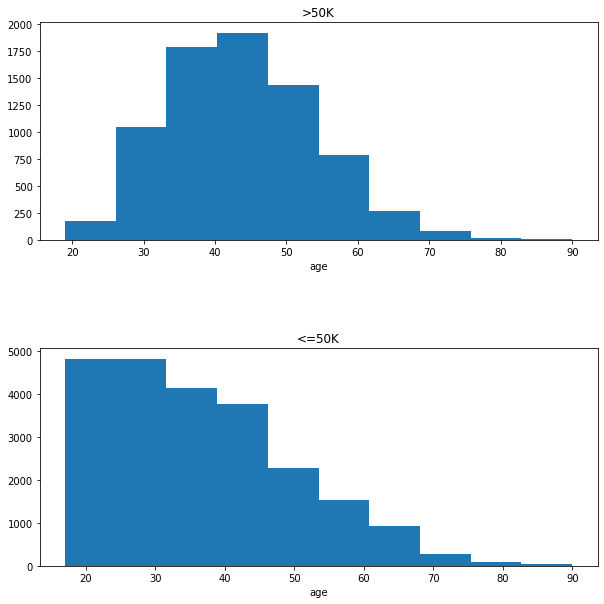

In [8]:
# analyze age
analyze_numerical_data("age")

sex


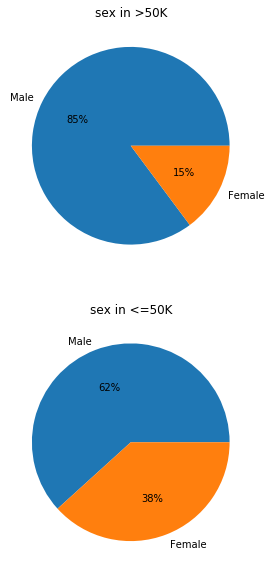

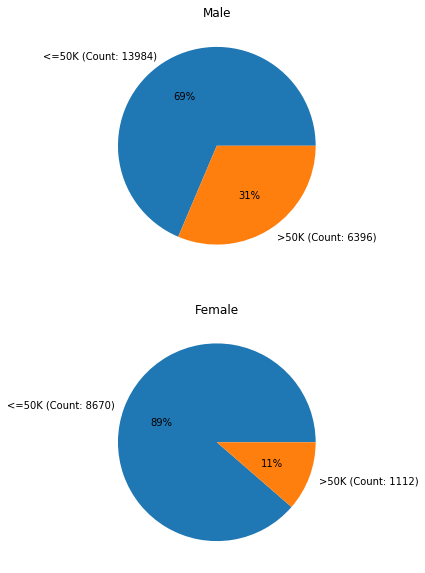

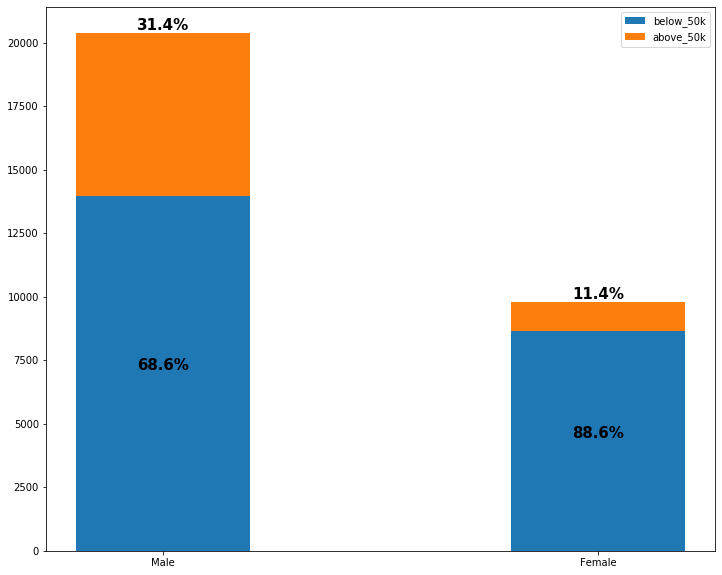

In [9]:
# analyze sex
analyze_categorical_data("sex")
analyze_per_unique_value("sex")
analyze_categorical_data_all('sex')

education


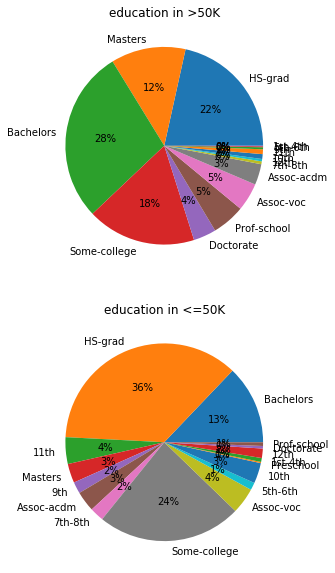

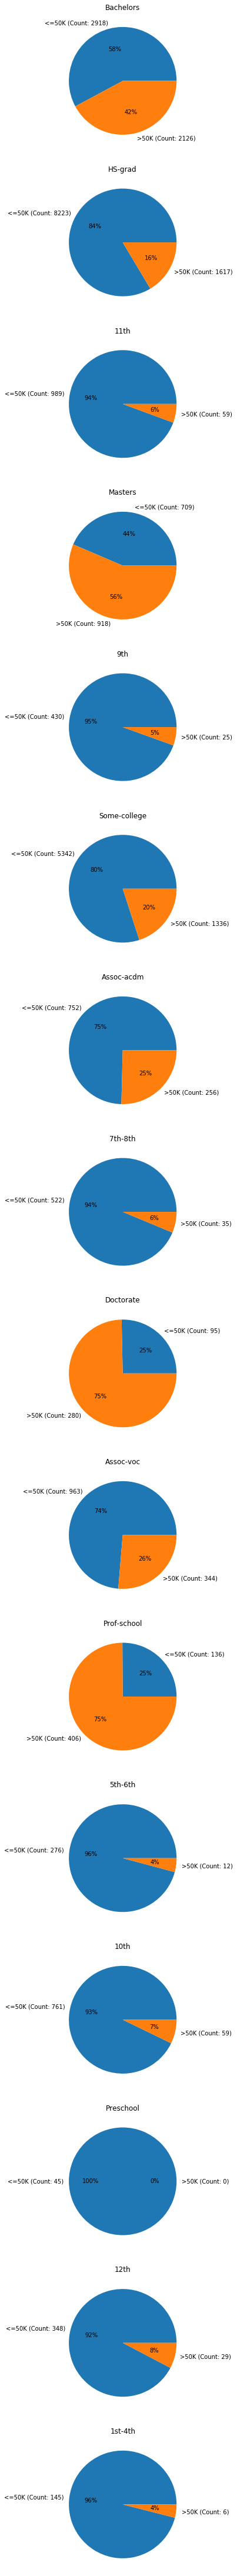

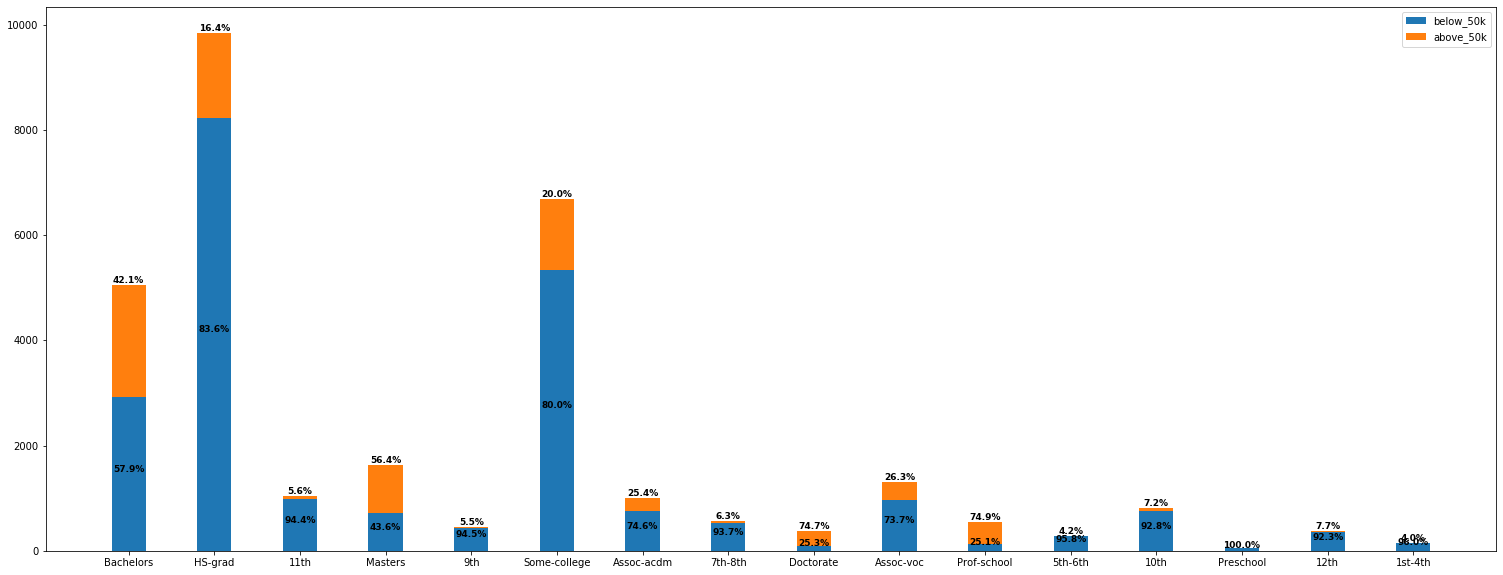

In [10]:
# analyze education
analyze_categorical_data("education")
analyze_per_unique_value("education")
analyze_categorical_data_all('education')

marital-status


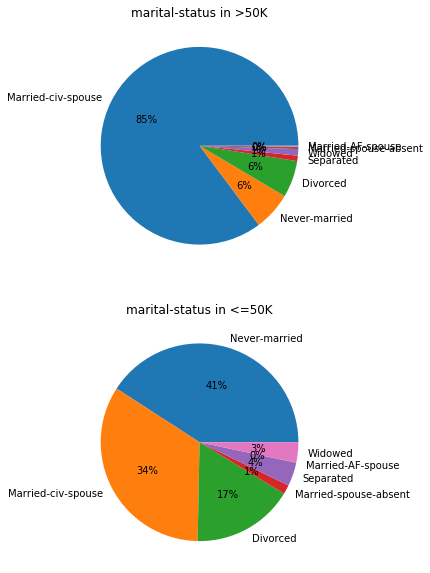

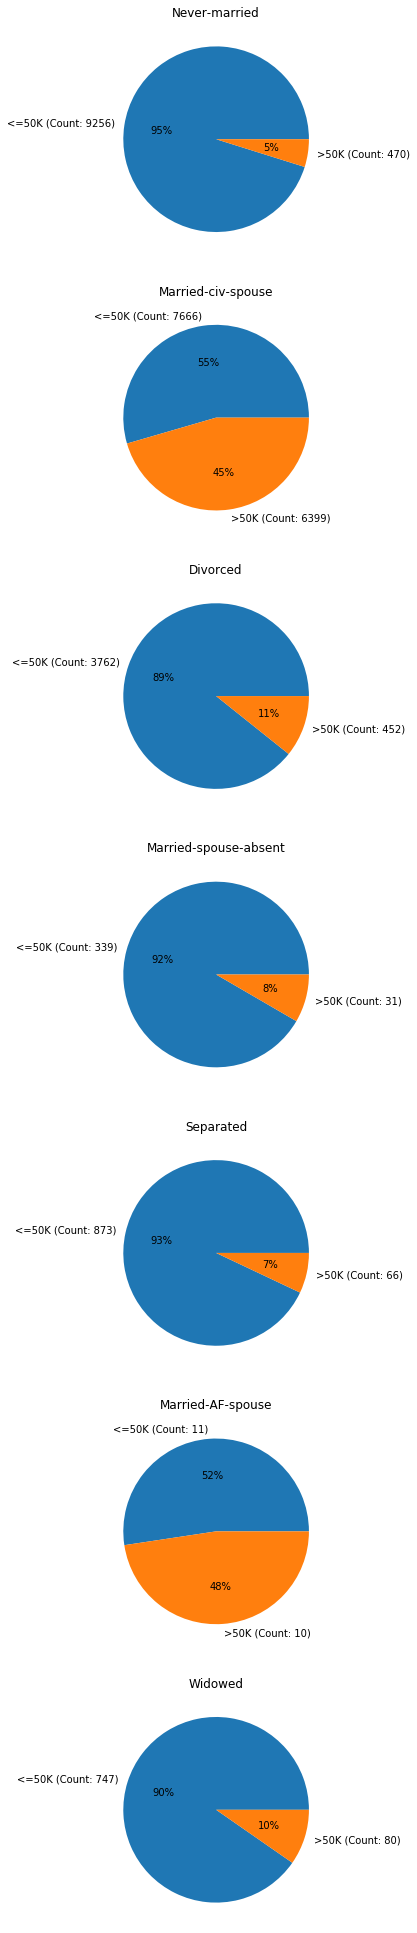

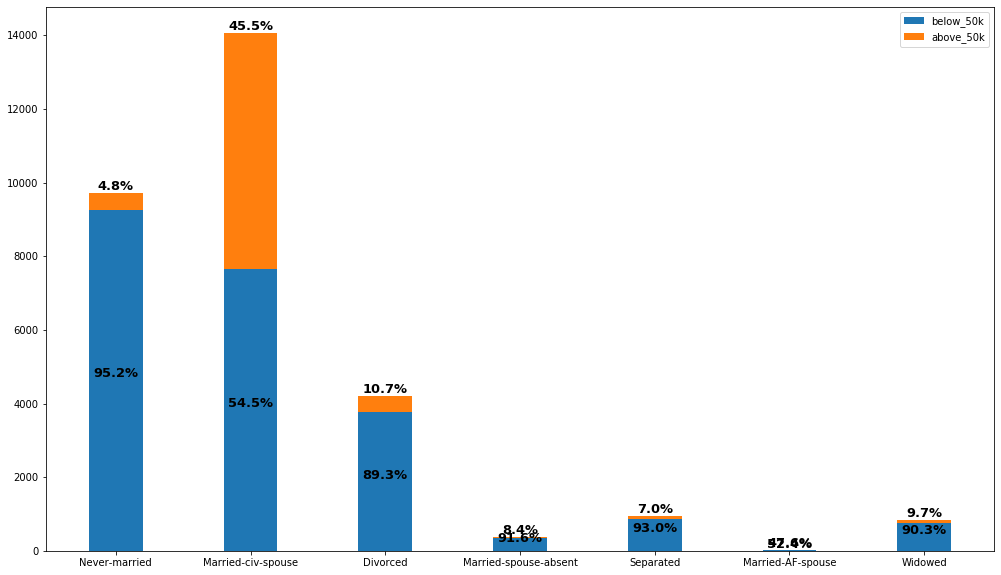

In [11]:
# analyze marital-status
analyze_categorical_data("marital-status")
analyze_per_unique_value("marital-status")
analyze_categorical_data_all('marital-status')

workclass


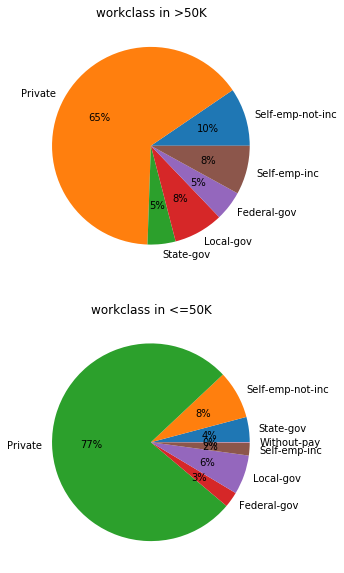

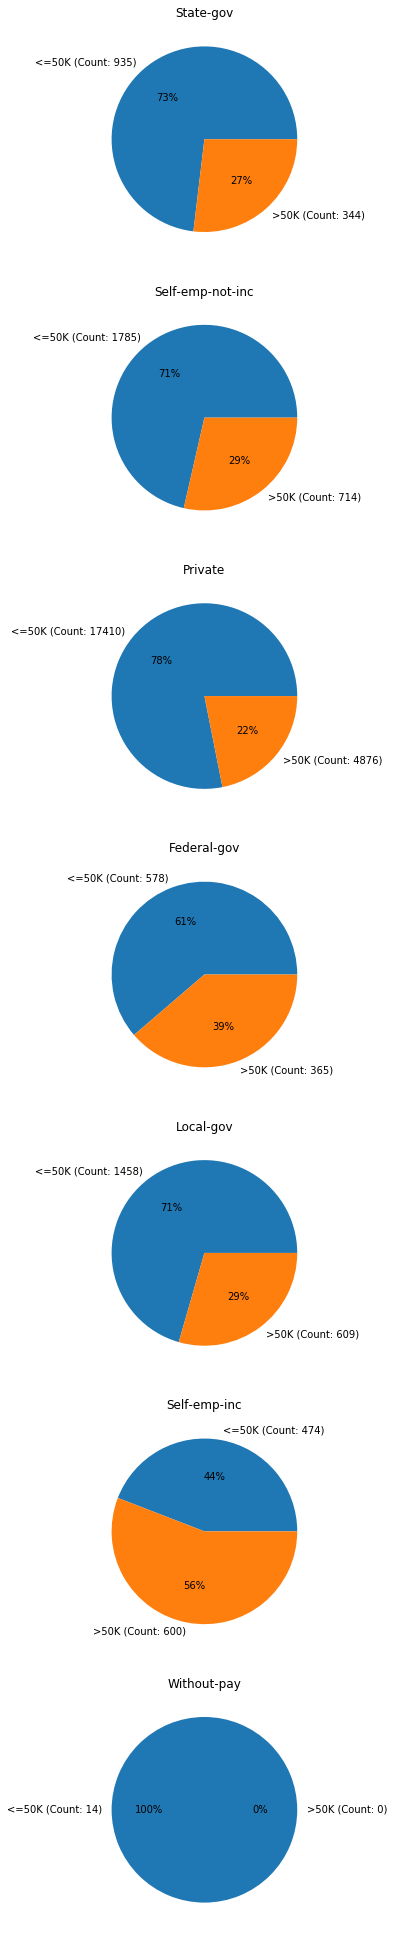

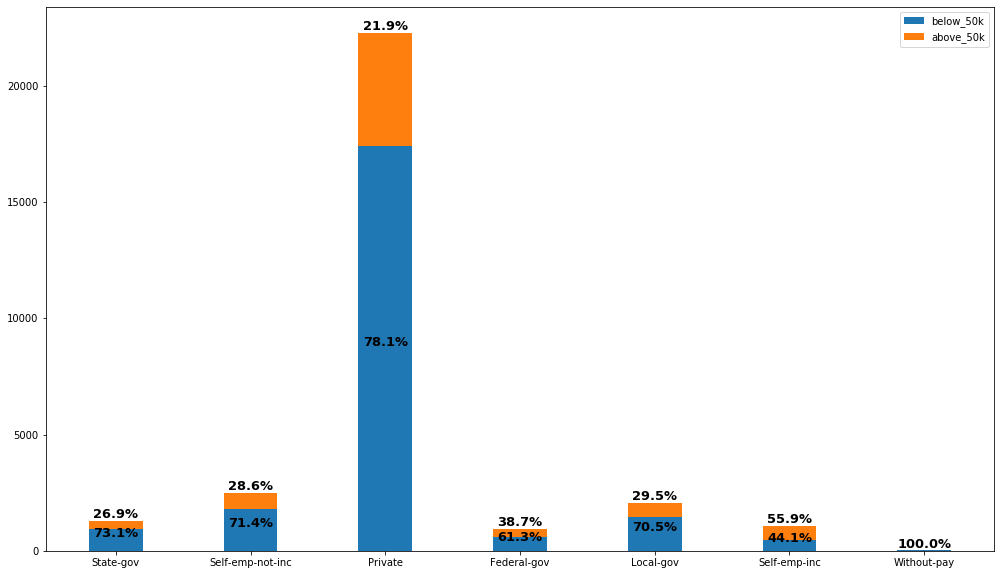

In [12]:
# analyze workclass
analyze_categorical_data("workclass")
analyze_per_unique_value("workclass")
analyze_categorical_data_all('workclass')

fnlwgt

Mean
Above 50K = 188149.96217368142
Below 50K = 190338.64672905448

Median
Above 50K = 176185.0
Below 50K = 179508.5

Standard Deviation
Above 50K = 102814.88940721683
Below 50K = 106568.99082609416


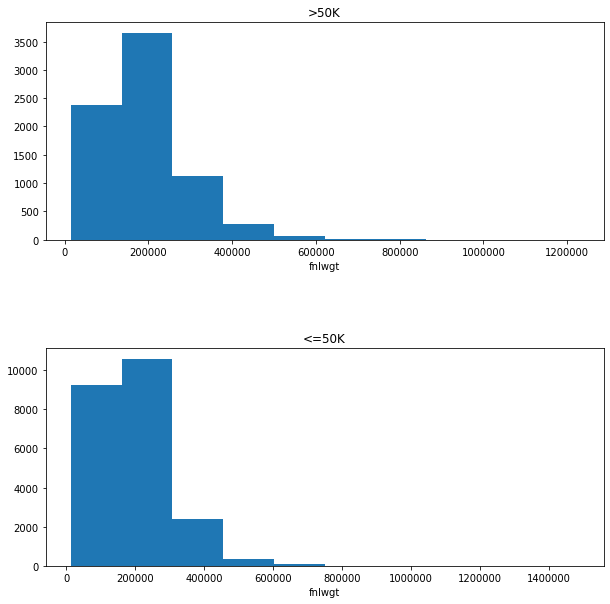

In [13]:
# analyze fnlwgt
analyze_numerical_data("fnlwgt")

education-num


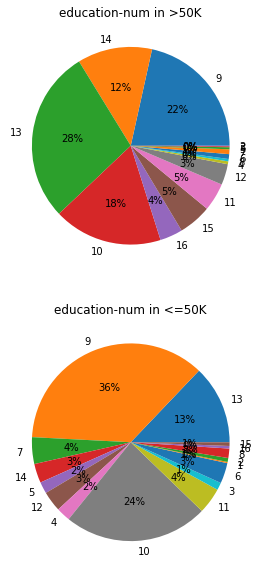

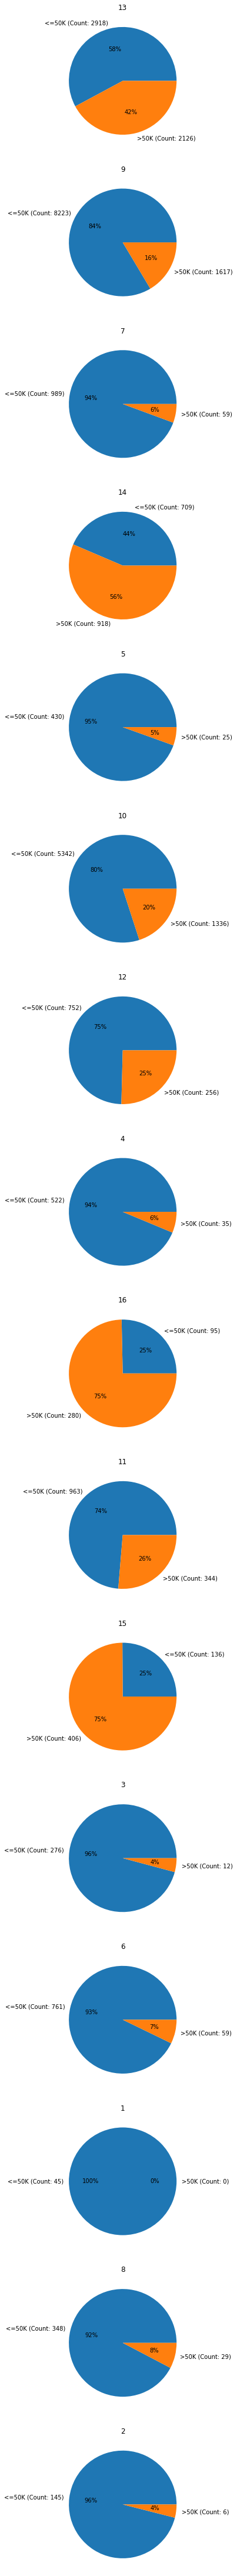

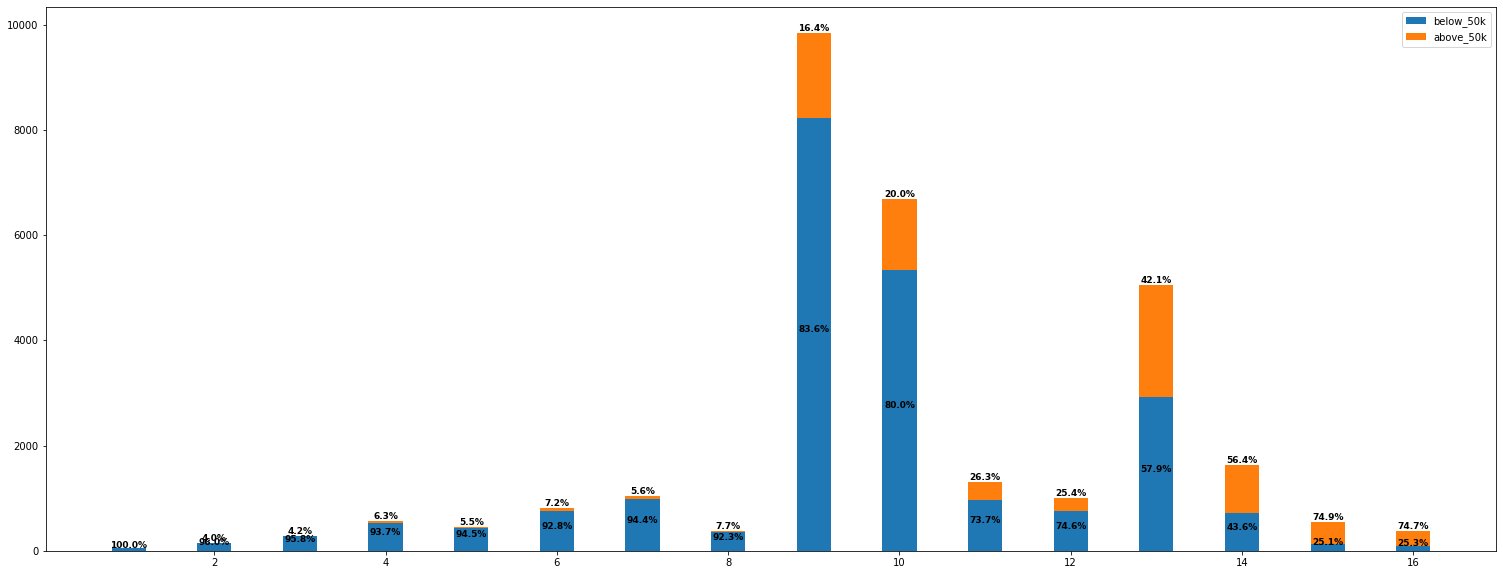

In [14]:
# analyze education-num
analyze_categorical_data("education-num")
analyze_per_unique_value("education-num")
analyze_categorical_data_all("education-num")

occupation


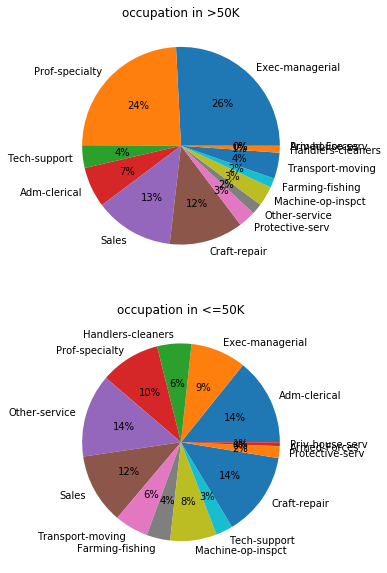

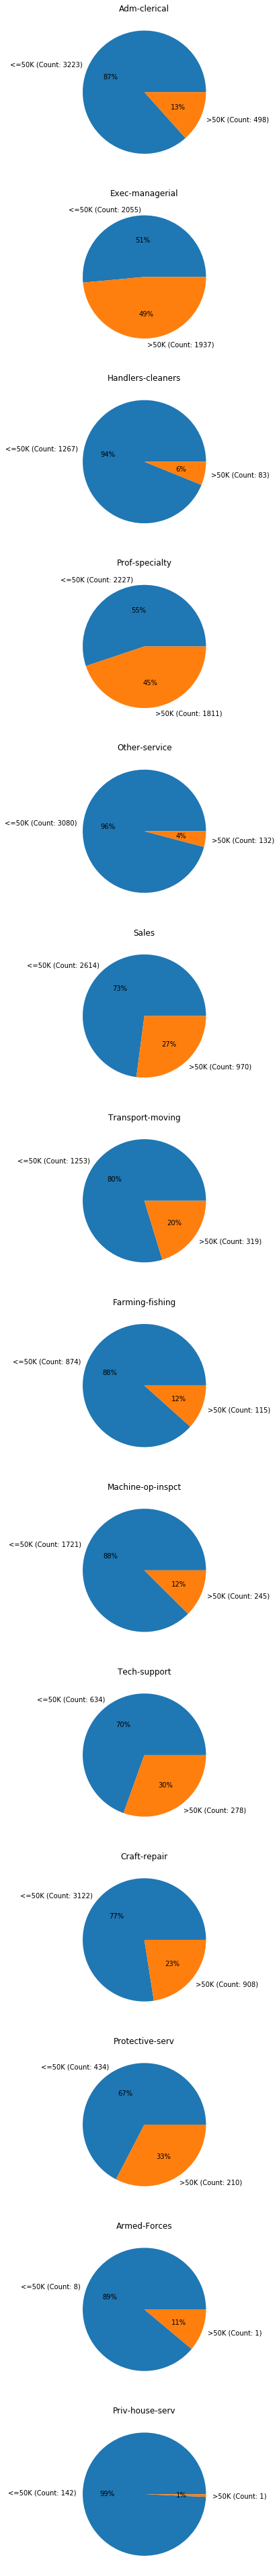

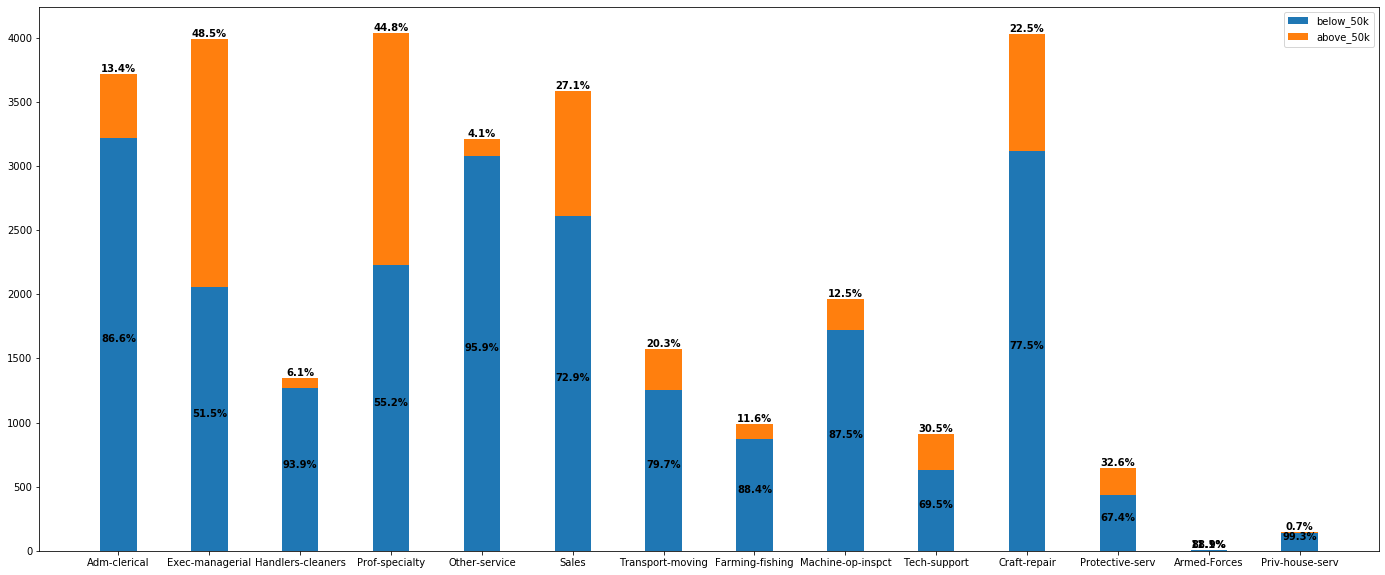

In [15]:
# analyze occupation
analyze_categorical_data("occupation")
analyze_per_unique_value("occupation")
analyze_categorical_data_all("occupation")

relationship


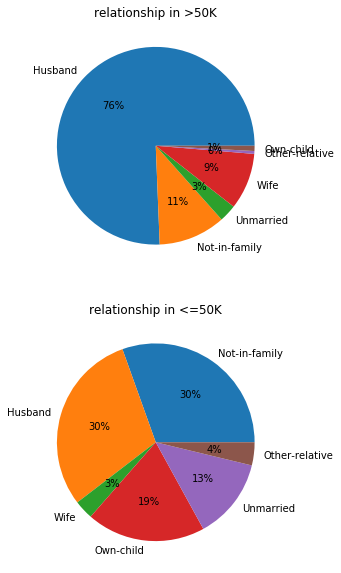

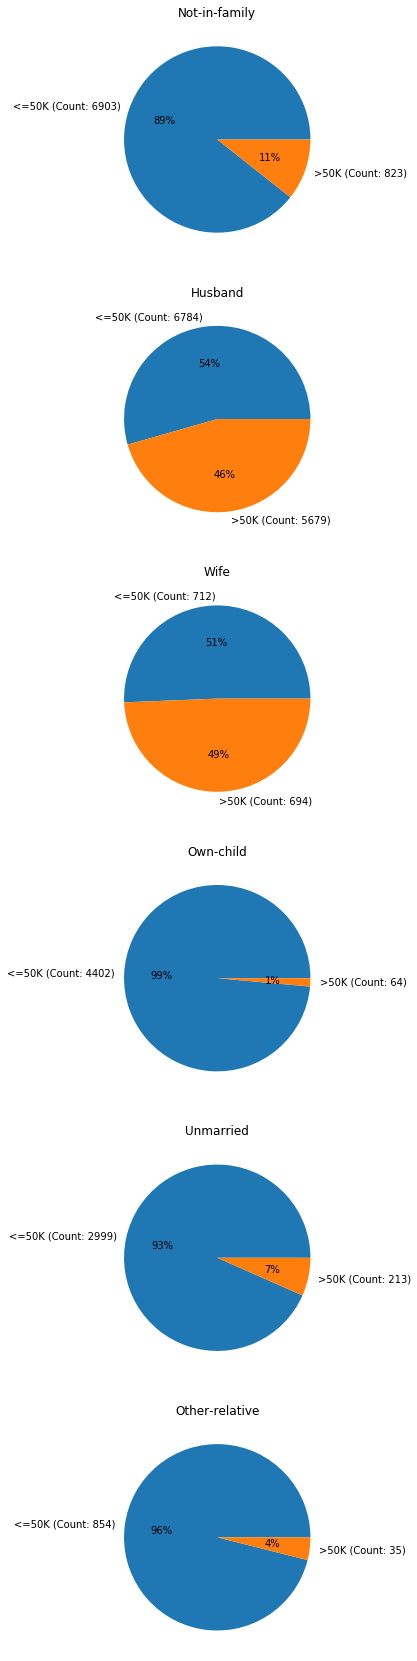

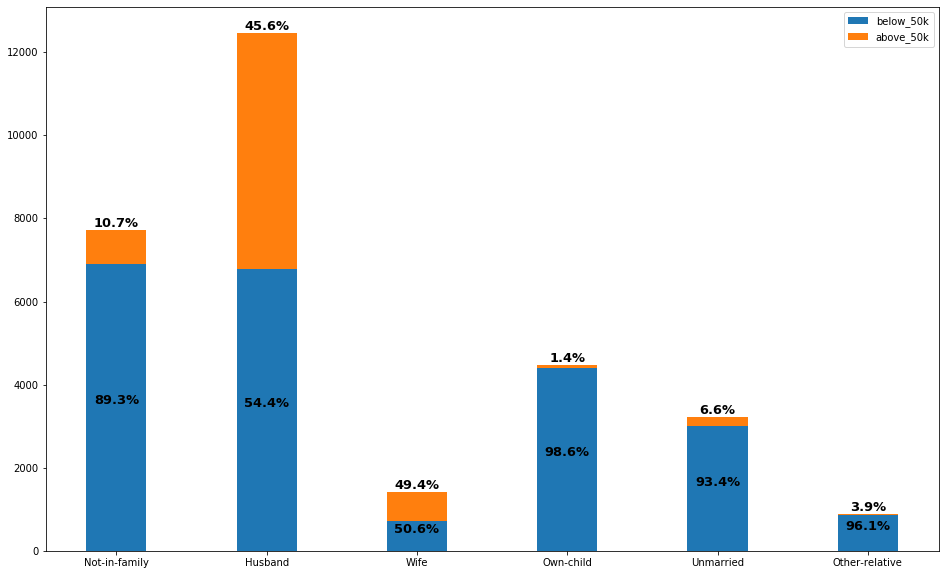

In [16]:
# analyze relationship
analyze_categorical_data("relationship")
analyze_per_unique_value("relationship")
analyze_categorical_data_all("relationship")

race


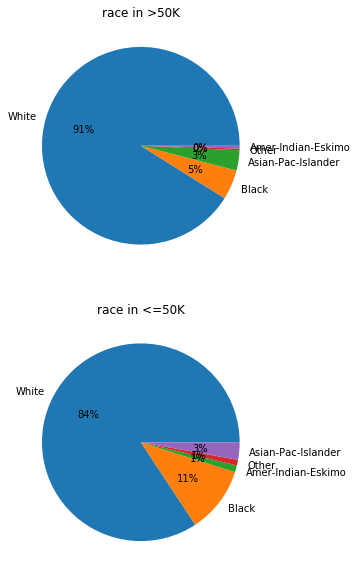

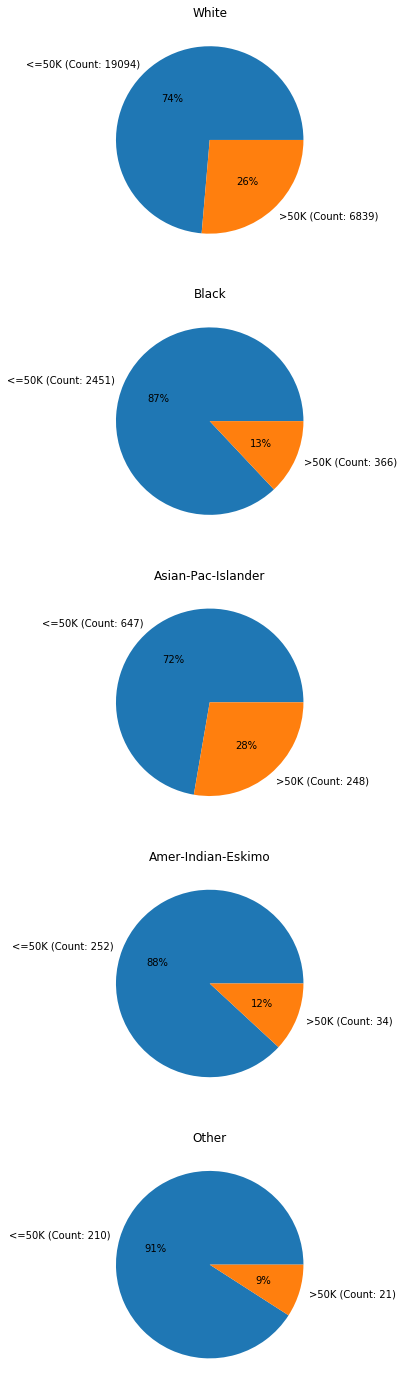

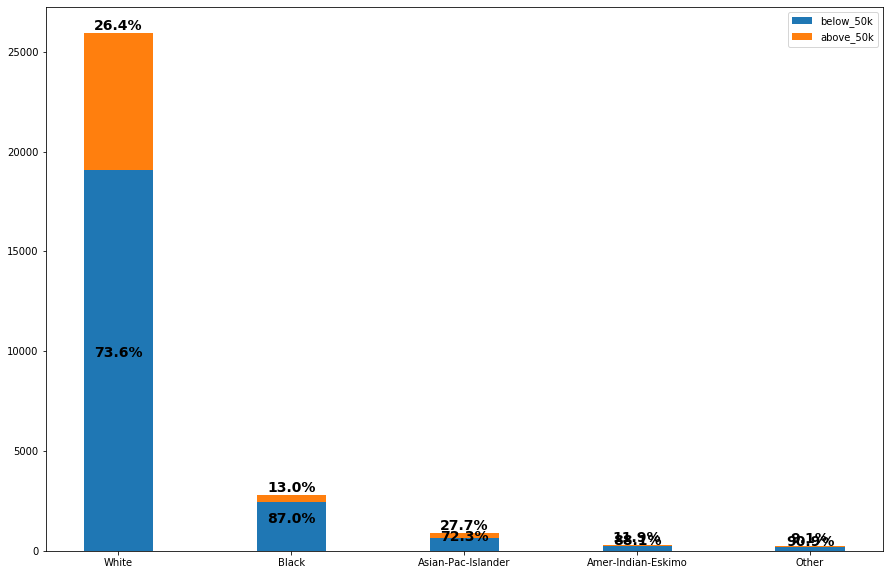

In [17]:
# analyze race
analyze_categorical_data("race")
analyze_per_unique_value("race")
analyze_categorical_data_all("race")

capital-gain

Mean
Above 50K = 3937.6798082045816
Below 50K = 148.8938377328507

Median
Above 50K = 0.0
Below 50K = 0.0

Standard Deviation
Above 50K = 14385.101938325177
Below 50K = 936.3716120599768


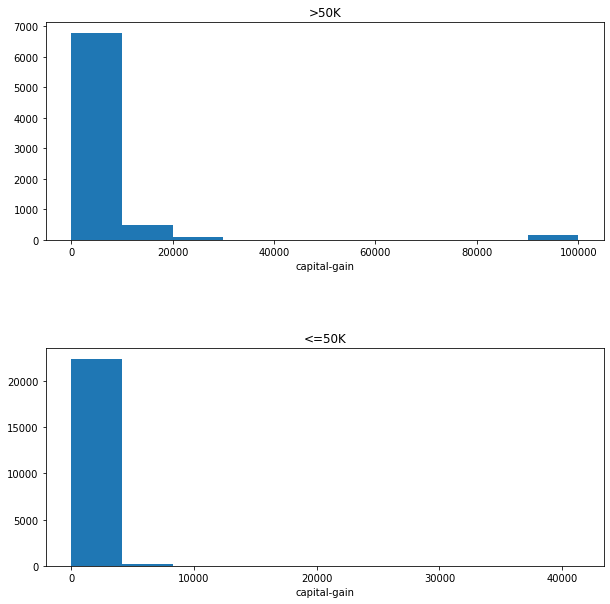

In [18]:
# analyze capital-gain
analyze_numerical_data("capital-gain")

capital-loss

Mean
Above 50K = 193.75066595631327
Below 50K = 53.44800035313852

Median
Above 50K = 0.0
Below 50K = 0.0

Standard Deviation
Above 50K = 592.7861087307447
Below 50K = 310.2634148738493


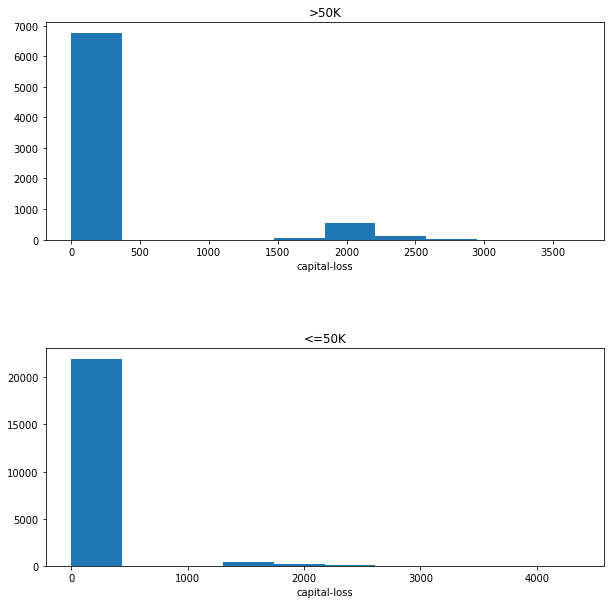

In [19]:
# analyze capital-loss
analyze_numerical_data("capital-loss")

hours-per-week

Mean
Above 50K = 45.70657964837507
Below 50K = 39.34859186015715

Median
Above 50K = 40.0
Below 50K = 40.0

Standard Deviation
Above 50K = 10.736271573483807
Below 50K = 11.950510368604052


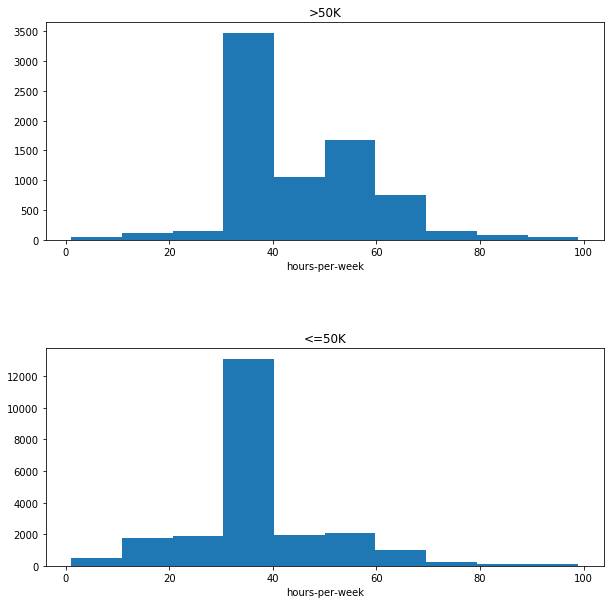

In [20]:
# analyze hours-per-week
analyze_numerical_data("hours-per-week")

native-country


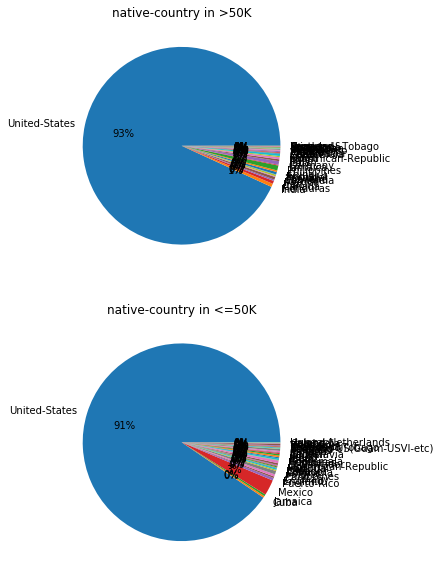

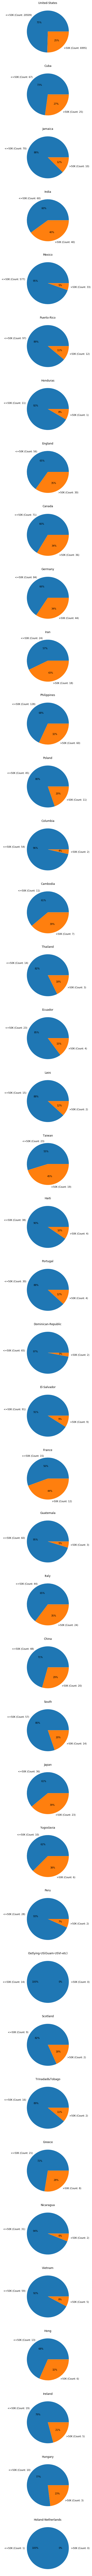

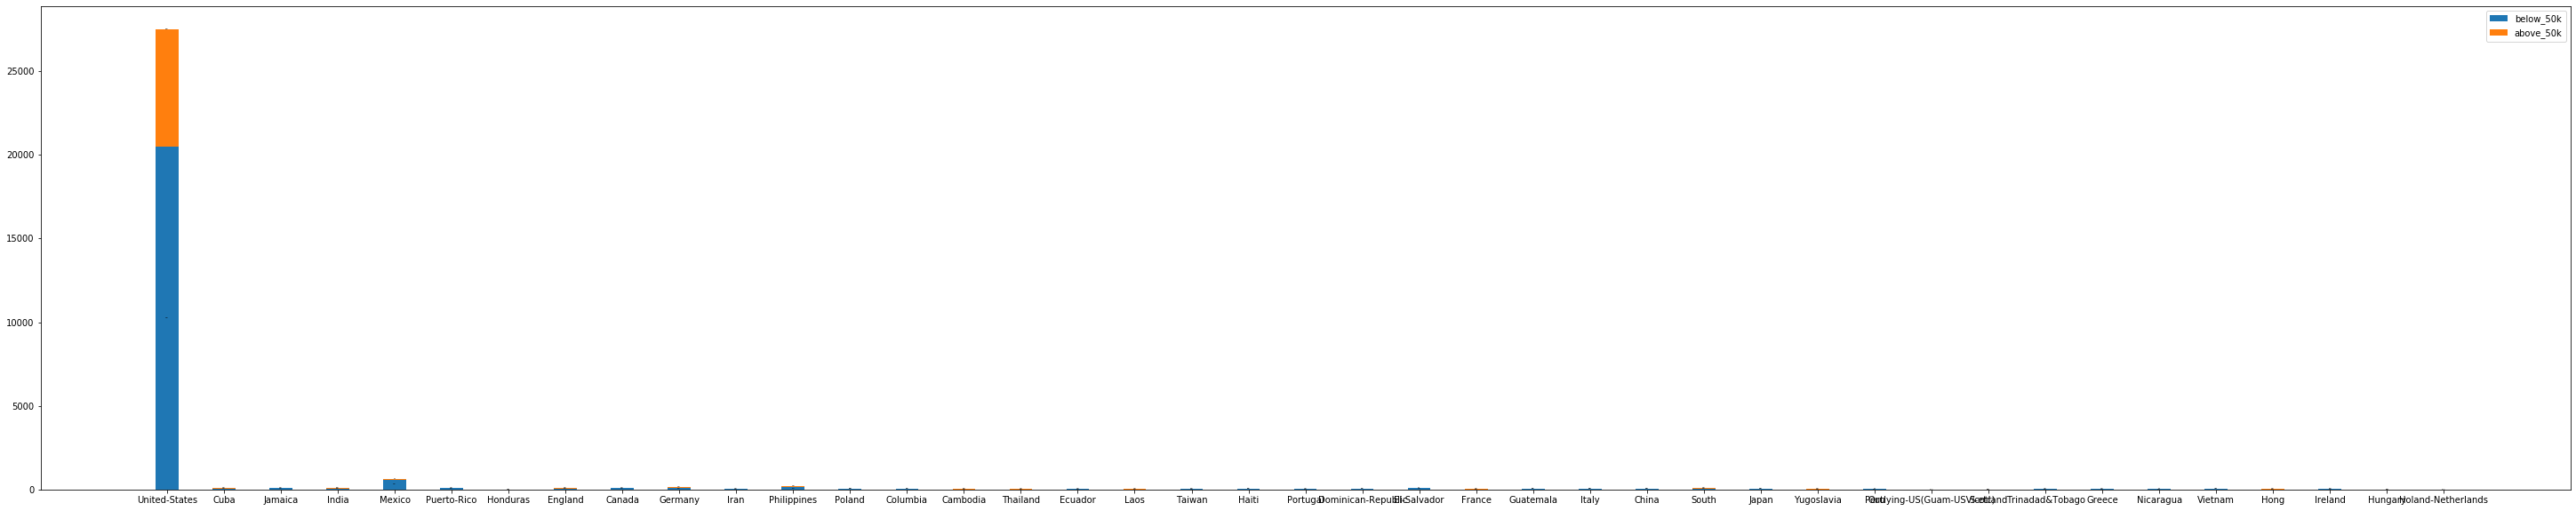

In [23]:
# analyze native-country
analyze_categorical_data("native-country")
analyze_per_unique_value("native-country")
analyze_categorical_data_all("native-country")

In [22]:
print('According to the every relationship with every feature and salary, we can find "captial-gain", "age", "hours-per-week" are important features ')

According to the every relationship with every feature and salary, we can find "captial-gain", "age", "hours-per-week" are important features 
